In [1]:
#summarise performance of multiple settings across multiple random seeds

experiment_prefix = "chr1x2"
db_name = "runs_perf-metric-auROC.db"

In [2]:
#read db objects
import yaml
db_records = yaml.load(open(db_name).read())['records']

In [3]:
from collections import defaultdict

filtered_records = [x for x in db_records if experiment_prefix in x['message']]
grouped_records = defaultdict(list)
#group records by the model descriptor tag
for filtered_record in filtered_records:
    experiment_prefix, model_descriptor, seed = filtered_record['message'].split()
    grouped_records[model_descriptor].append(filtered_record)

In [4]:
auroc_per_group = dict([(key, [x['best_valid_perf_info']['valid_all_stats']['mean_auROC'] for x in grouped_records[key]]) for key in grouped_records])
auprc_per_group = dict([(key, [x['best_valid_perf_info']['valid_all_stats']['mean_auPRC'] for x in grouped_records[key]]) for key in grouped_records])

In [5]:
auprc_per_group

{'rc-f_nbf-16_ws-f_str-20': [0.8783493273068049,
  0.8793182524839646,
  0.877218108926655,
  0.878305718881865,
  0.8727479591785136,
  0.8698197470372846,
  0.8750386844107139,
  0.8700635550493123,
  0.8733968831825561,
  0.8700403956662438],
 'rc-f_nbf-16_ws-t_symws-t_ircws-f_str-20': [0.8841767337896221,
  0.8813887299750731,
  0.8774045226069526,
  0.8748801028533978,
  0.8784180279366711,
  0.8730604297116461,
  0.8680344555388565,
  0.8715795966446911,
  0.8662187569739704,
  0.8721066631473229],
 'rc-f_nbf-32_ws-f_str-20': [0.8974829710897154,
  0.9003368015496189,
  0.8891876659551944,
  0.8978513098818136,
  0.8976082455204037,
  0.8946763870406289,
  0.8925847369989665,
  0.8930679661861255,
  0.8957402447159565,
  0.8932487124224588],
 'rc-f_nbf-8_ws-f_str-20': [0.8519548008380554,
  0.8599975594932273,
  0.8621697149687108,
  0.857566333710457,
  0.84756478532793,
  0.8508834173559976,
  0.8408261120737451,
  0.8481166340559391,
  0.8432206740684225],
 'rc-t_nbf-16_ws-t_s

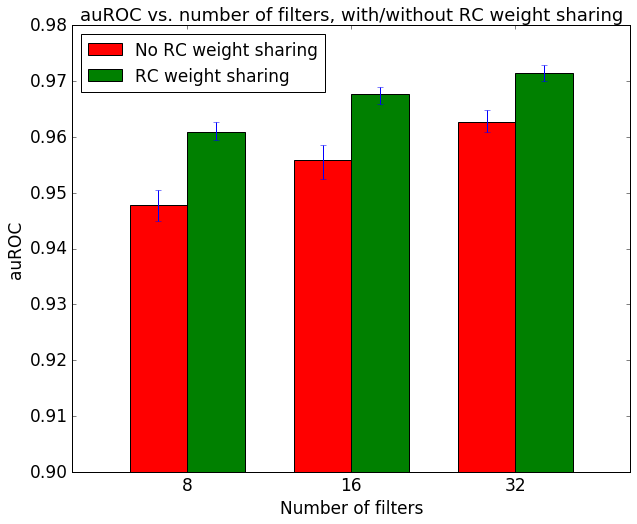

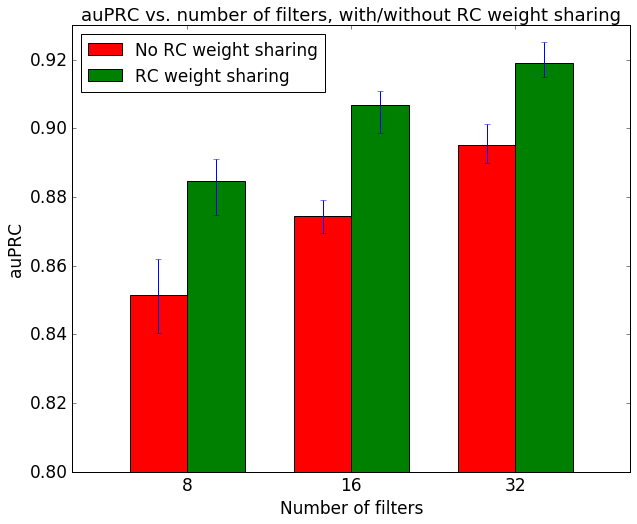

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

without_rc_keys = ['rc-f_nbf-8_ws-f_str-20', 'rc-f_nbf-16_ws-f_str-20', 'rc-f_nbf-32_ws-f_str-20']
with_rc_keys = ['rc-t_nbf-8_ws-t_symws-f_ircws-t_str-20', 'rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20', 'rc-t_nbf-32_ws-t_symws-f_ircws-t_str-20']

for group_stats, stats_name, ymin, ymax in [(auroc_per_group, 'auROC', 0.9, 0.98), (auprc_per_group, 'auPRC', 0.8, 0.93)]:

    N = 3
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars
    fig, ax = plt.subplots(figsize=(10,8))

    
    all_rects = []
    
    for series_idx, (series, color) in enumerate([(without_rc_keys, 'r'), (with_rc_keys, 'g')]):
        means = np.array([np.mean(group_stats[x]) for x in series])
        upper_error = np.array([np.max(group_stats[x]) for x in series]) - means
        lower_error = np.abs(np.array([np.min(group_stats[x]) for x in series]) - means)
        rects = ax.bar(ind + width*series_idx, means, width, color=color, yerr=[upper_error, lower_error], ecolor='b')
        all_rects.append(rects)
        
    # add some text for labels, title and axes ticks
    ax.set_ylabel(stats_name, fontsize=17)
    ax.set_xlabel("Number of filters", fontsize=17)
    ax.set_ylim(ymin,ymax)
    ax.set_title(stats_name+' vs. number of filters, with/without RC weight sharing', fontsize=18)
    ax.set_xticks(ind + 2*width / 2.0)
    ax.set_xticklabels(('8', '16', '32'))
    plt.tick_params(labelsize=17)
    ax.set_xlim(-width, (N-1)+3*width)
    ax.legend((all_rects[0][0], all_rects[1][0]), ('No RC weight sharing', 'RC weight sharing'), loc=2, fontsize=17)
    plt.show()